Seed set to 1
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 199.86it/s]


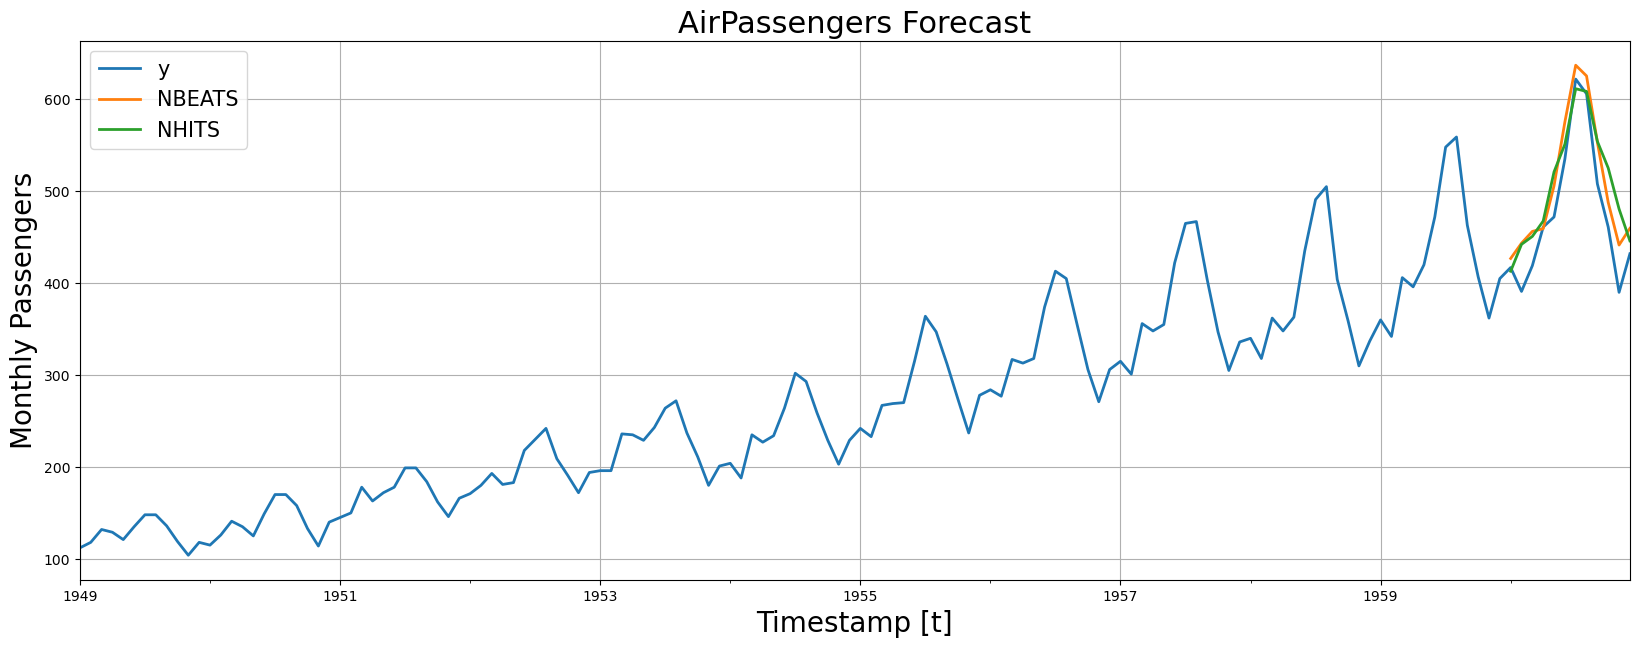

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


In [3]:

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
# Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
# plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

# plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

# ax.set_title('AirPassengers Forecast', fontsize=22)
# ax.set_ylabel('Monthly Passengers', fontsize=20)
# ax.set_xlabel('Timestamp [t]', fontsize=20)
# ax.legend(prop={'size': 15})
# ax.grid()


: 

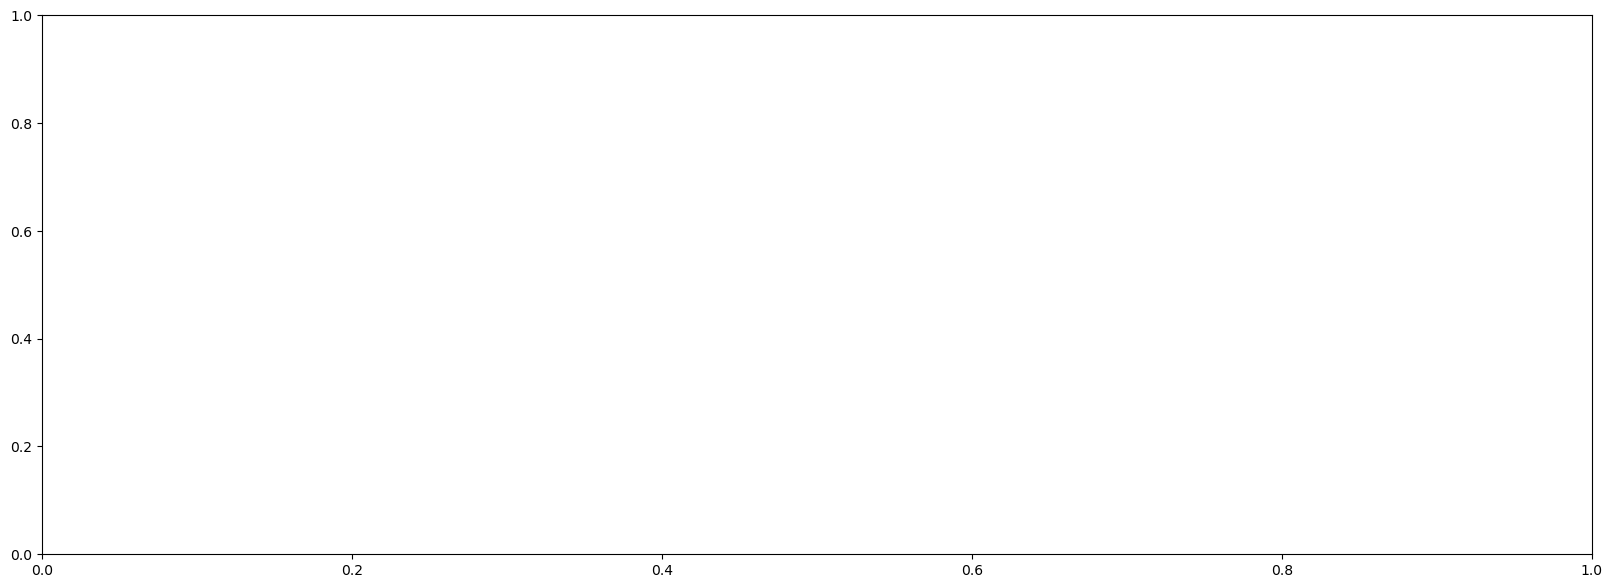

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (20, 7))